<a href="https://colab.research.google.com/github/ajaycode/machine-learning/blob/main/Geospatial_Data_Wrangling_for_Pandas_Experts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geospatial Data Wrangling for Pandas Experts
## https://towardsdatascience.com/geospatial-data-wrangling-for-pandas-experts-96c130c78bd8

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 
     |████████████████████████████████| 16.6 MB 44.9 MB/s 
     |████████████████████████████████| 7.8 MB 56.7 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
# load in dataset
dataSource = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(dataSource)

In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

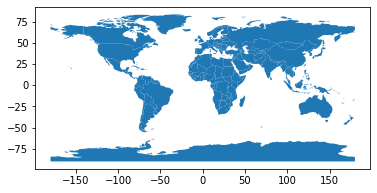

In [ ]:
gdf.plot()

In [ ]:
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# getting information about the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [ ]:
# number of rows and columns
gdf.shape

(177, 6)

In [ ]:
# unique values of a columns 
gdf['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [ ]:
# filtering rows
gdf[gdf['continent']=='Africa'].head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."


In [ ]:
# create calculated column
gdf['gdp_per_capita'] = gdf['gdp_md_est']/gdf['pop_est']

gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_capita
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.006176
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.001089
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001504
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046195
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.065298


In [ ]:
# generate summary statistics
gdf.describe().T

,count,mean,std,min,25%,50%,75%,max
pop_est,177.0,4.324346e+07,1.513543e+08,140.000000,3.301000e+06,1.019232e+07,3.182530e+07,1.397715e+09
gdp_md_est,177.0,4.934739e+05,2.019326e+06,16.000000,1.346900e+04,5.040000e+04,2.619210e+05,2.143323e+07
gdp_per_capita,177.0,1.619303e-02,2.567632e-02,0.000261,1.816545e-03,5.789644e-03,1.782842e-02,2.000000e-01


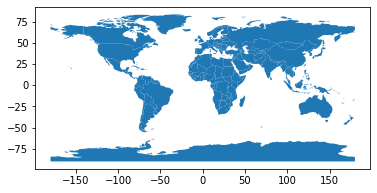

In [ ]:
# visualizing the polygons
gdf.plot()

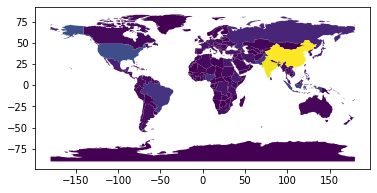

In [ ]:
# visualize a data column
gdf.plot(column = 'pop_est')

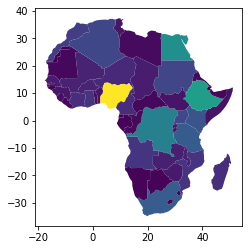

In [ ]:
# filter Africa data from the dataframe
africa = gdf[gdf['continent']=='Africa']

# plot
africa.plot(column = 'pop_est')

In [ ]:
import matplotlib.pyplot as plt

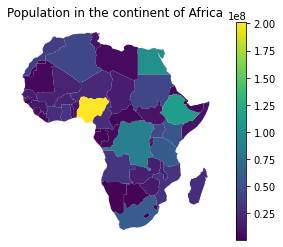

In [ ]:
# use matplotlib functionalities to customize maps
africa.plot(column='pop_est', legend=True)
plt.axis("off")
plt.title("Population in the continent of Africa");